In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering

# Load the data from the CSV file
data = pd.read_csv('Womens.csv')

# Select the relevant features (X)
X = data[['Age', 'Rating', 'Positive Feedback Count']]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Create a transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Age', 'Rating', 'Positive Feedback Count'])
    ])

# Apply the preprocessing to both training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Add a customer segmentation step (Agglomerative Clustering)
n_clusters = 10
hac = AgglomerativeClustering(n_clusters=n_clusters)  # Use AgglomerativeClustering
cluster_labels_train = hac.fit_predict(X_train)  # Get cluster labels for training data
cluster_labels_test = hac.fit_predict(X_test)  # Get cluster labels for testing data

# Add cluster labels to the training and testing data
X_train = pd.DataFrame(X_train, columns=['Age', 'Rating', 'Positive Feedback Count'])
X_train['Cluster'] = cluster_labels_train
X_test = pd.DataFrame(X_test, columns=['Age', 'Rating', 'Positive Feedback Count'])
X_test['Cluster'] = cluster_labels_test

# Print the first few rows of the DataFrames with cluster labels
print("Training Data:")
print(X_train.head())
print("\nTesting Data:")
print(X_test.head())

Training Data:
        Age    Rating  Positive Feedback Count  Cluster
0 -0.991912  0.720737                 -0.44412        1
1 -0.828835  0.720737                 -0.44412        1
2 -0.991912  0.720737                 -0.44412        1
3  1.291168  0.720737                 -0.44412        7
4 -0.339604  0.720737                 -0.44412        1

Testing Data:
        Age    Rating  Positive Feedback Count  Cluster
0 -0.747297 -0.178294                 2.852032        3
1  1.128091 -0.178294                -0.444120        2
2  1.046552 -0.178294                 0.076325        2
3 -0.584219 -1.077326                 0.076325        6
4 -1.073451  0.720737                -0.444120        0


Silhouette Score: 0.616095019992466


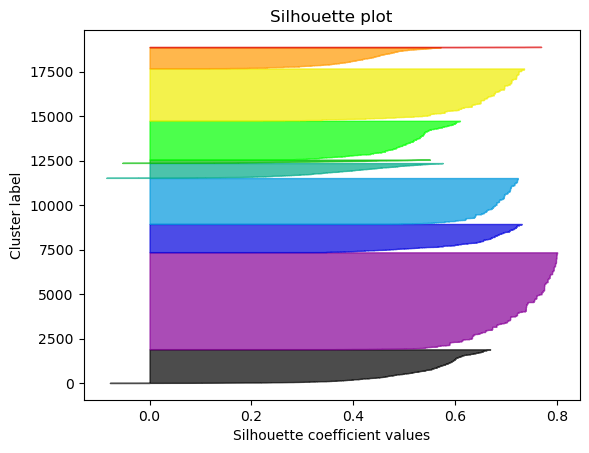

In [9]:
# Silhouette Analysis
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np  # Add import for numpy

silhouette_avg = silhouette_score(X_train, X_train['Cluster'])  # Change here
print(f"Silhouette Score: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(X_train, X_train['Cluster'])  # Change here

y_lower = 10
for cluster in range(n_clusters):
    cluster_silhouette_values = sample_silhouette_values[X_train['Cluster'] == cluster]  # Change here
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(cluster) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

plt.title("Silhouette plot")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()
